In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Import data 

In [2]:
ds_thread = pd.read_csv("https://osf.io/t8wrf/download")
ds_proc = pd.read_csv("https://osf.io/dkj9n/download")
ds_control = pd.read_csv("https://osf.io/m5du9/download")

### Concatenate data

In [3]:
ds = pd.concat([ds_control, ds_thread, ds_proc])

In [4]:
ds

,updates total,updates min,updates max,updates std,sent total,sent min,sent max,sent std,recieved total,received min,...,nprocs,nthreads,replicate,seconds,asynchronous,hostname,source sha,container tag,container digest,executable
0,109443,109443,109443,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,0,1800,-1,vim-200,960f0a0686df91bd8e86dd788ccc266ad7eb942c,sha-128c94d,sha256:9ed9bae2fb9230c4547ec0768d5877930ecc10a...,disthiny
1,440970,109682,111142,558.666493,NaN,NaN,NaN,NaN,NaN,NaN,...,4,1,0,1800,-1,vim-002,960f0a0686df91bd8e86dd788ccc266ad7eb942c,sha-128c94d,sha256:9ed9bae2fb9230c4547ec0768d5877930ecc10a...,disthiny
2,1266452,76874,81514,1460.918226,NaN,NaN,NaN,NaN,NaN,NaN,...,16,1,0,1800,-1,vim-002,960f0a0686df91bd8e86dd788ccc266ad7eb942c,sha-128c94d,sha256:9ed9bae2fb9230c4547ec0768d5877930ecc10a...,disthiny
3,2366016,71843,75490,1140.984553,NaN,NaN,NaN,NaN,NaN,NaN,...,32,1,0,1800,-1,vim-002,960f0a0686df91bd8e86dd788ccc266ad7eb942c,sha-128c94d,sha256:9ed9bae2fb9230c4547ec0768d5877930ecc10a...,disthiny
4,4279242,62216,74477,2697.906192,NaN,NaN,NaN,NaN,NaN,NaN,...,64,1,0,1800,-1,vim-002,960f0a0686df91bd8e86dd788ccc266ad7eb942c,sha-128c94d,sha256:9ed9bae2fb9230c4547ec0768d5877930ecc10a...,disthiny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,32550,32550,32550,0.000000,263655000.0,263655000.0,263655000.0,0.0,263650950.0,263650950.0,...,1,1,5,5,4,"lac-[039-043,209,339,353-356,358-360,364,375-3...",d921d8db2a15ce62359b3bdbcb93089d78fc87b3,sha-5dcf5ca,sha256:9a11d6e77b1f28db2671225a1bc3dfc09f640aa...,channel_selection
356,33123,33123,33123,0.000000,268296300.0,268296300.0,268296300.0,0.0,268292250.0,268292250.0,...,1,1,6,5,4,"lac-[039-043,209,339,353-356,358-360,364,375-3...",d921d8db2a15ce62359b3bdbcb93089d78fc87b3,sha-5dcf5ca,sha256:9a11d6e77b1f28db2671225a1bc3dfc09f640aa...,channel_selection
357,34977,34977,34977,0.000000,283313700.0,283313700.0,283313700.0,0.0,283309650.0,283309650.0,...,1,1,7,5,4,"lac-[039-043,209,339,353-356,358-360,364,375-3...",d921d8db2a15ce62359b3bdbcb93089d78fc87b3,sha-5dcf5ca,sha256:9a11d6e77b1f28db2671225a1bc3dfc09f640aa...,channel_selection
358,31182,31182,31182,0.000000,252574200.0,252574200.0,252574200.0,0.0,252570150.0,252570150.0,...,1,1,8,5,4,"lac-[039-043,209,339,353-356,358-360,364,375-3...",d921d8db2a15ce62359b3bdbcb93089d78fc87b3,sha-5dcf5ca,sha256:9a11d6e77b1f28db2671225a1bc3dfc09f640aa...,channel_selection


# Graphing

### Determine number of updates per CPU (threads * processes)

In [5]:
ds_thread["ncpus"] = ds_thread["nthreads"] * ds_thread["nprocs"]
ds_thread["conflicts per cpu"] = ds_thread["conflicts total"] / ds_thread["ncpus"]
ds_thread["updates per cpu"] = ds_thread["updates total"] / ds_thread["ncpus"]

In [6]:
ds_proc["ncpus"] = ds_proc["nthreads"] * ds_proc["nprocs"]
ds_proc["conflicts per cpu"] = ds_proc["conflicts total"] / ds_proc["ncpus"]
ds_proc["updates per cpu"] = ds_proc["updates total"] / ds_proc["ncpus"]

In [7]:
ds_control["updates per cpu"] = ds_control["updates total"] / ds_control["nprocs"]

## Graph coloring problem

#### This problem is described in XXXXX. In basic terms it consists of assigning a separate color to nodes in a graph, so that yyy.

We first select only the data corresponding to the multithread graph coloring runs.

In [8]:
filtered_threads = ds_thread[
    (ds_thread["executable"]=="channel_selection") &
    (ds_thread["nprocs"] == 1)
]


Next, we graph it as a bar plot.

Text(0.5, 1.0, 'Multithread Graph Coloring')

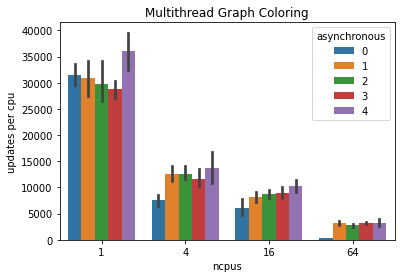

In [9]:
g = sns.barplot(x="ncpus", y="updates per cpu", hue="asynchronous", data=filtered_threads)

g.set_title('Multithread Graph Coloring')

In [ ]:
# optionall, run this cell to save the graph as a pdf
plt.savefig('multithread-graph-coloring.pdf', bbox_inches='tight')

We now select only the multiprocess graph coloring data...

In [10]:
filtered_procs = ds_proc[
    (ds_proc["executable"]=="channel_selection") &
    (ds_proc["nthreads"] == 1)
]

...and graph it the same way.

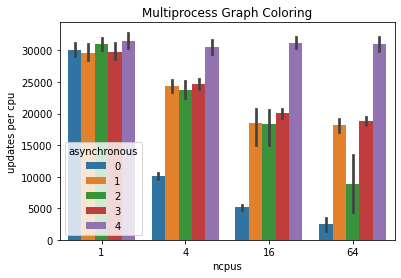

In [11]:
g = sns.barplot(x="ncpus", y="updates per cpu", hue="asynchronous", data=filtered_procs)

g.set_title('Multiprocess Graph Coloring')

plt.show()

In [ ]:
# optionall, run this cell to save the graph as a pdf
plt.savefig('multiprocess-graph-coloring.pdf', bbox_inches='tight')

## Digital evolution problem

#### This problem consists of evolving a system of digital cells. You can read more about dishtiny [here](https://dishtiny.readthedocs.io/en/latest/).

Once again, we first only select the multithreaded data corresponding to this problem.

In [12]:
filtered_threads_dish = ds_thread[
    (ds_thread["executable"]=="dishtiny") &
    (ds_thread["nprocs"] == 1)
]

And we graph it.

Text(0.5, 1.0, 'Multithread Digital Evolution')

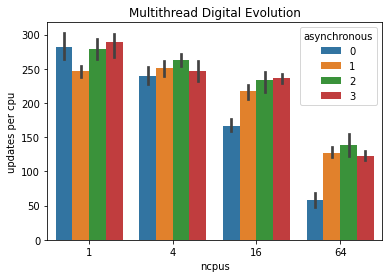

In [13]:
f = sns.barplot(x="ncpus", y="updates per cpu", hue="asynchronous", data=filtered_threads_dish)

f.set_title('Multithread Digital Evolution')

In [ ]:
# optionall, run this cell to save the graph as a pdf
plt.savefig('multithread-digital-evolution.pdf', bbox_inches='tight')

Finally, we select and graph the multiprocess digital evolution data.

In [14]:
filtered_procs_dish = ds_proc[
    (ds_proc["executable"]=="dishtiny") &
    (ds_proc["nthreads"] == 1)
]

Text(0.5, 1.0, 'Multiprocess Digital Evolution')

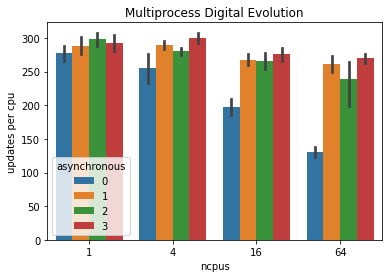

In [15]:
g = sns.barplot(x="ncpus", y="updates per cpu", hue="asynchronous", data=filtered_procs_dish)

g.set_title('Multiprocess Digital Evolution')

In [ ]:
# optionall, run this cell to save the graph as a pdf
plt.savefig('multiprocess-digital-evolution.pdf', bbox_inches='tight')

### Digital evolution control

#### This data was gathered by running separate instances of dishtiny. Given that they had no communication, they were instead competing for hardware resources. We can see a clear decline in performance after 4 separate instances were run, which helps explain the (arguably lower) drop in performance experienced in the multiprocess and multithread versions of this same problem.

We do not need to filter this data because it is in a separate dataset. This is because it was collected after the other runs.

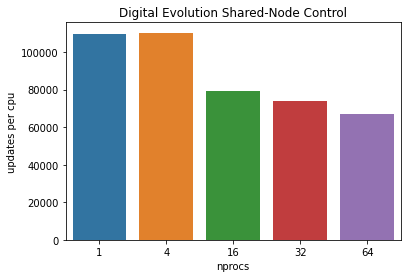

In [25]:
g = sns.barplot(x="nprocs", y="updates per cpu", data=ds_control)

g.set_title('Digital Evolution Shared-Node Control')

In [ ]:
plt.savefig('digital-evolution-control.pdf', bbox_inches='tight')